# 4Geeks Insurance S.L.

In [96]:
import pandas as pd

total_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv', sep = ',')
total_data.to_csv('../data/raw/linear-regression-project.csv')
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**<p align="center">EXPLORATORY DATA ANALYSIS</p>**

In [97]:
total_data.shape

(1338, 7)

Dataset de 1338 filas y 7 columnas

In [98]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Dataset de 4 variables numéricas y 3 categóricas

In [99]:
total_data.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


No hay filas duplicadas en la tabla

*Analysis of categorial variables*

C:\Users\crroj\AppData\Local\Temp\ipykernel_19744\3584937596.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[2].set_xticklabels(axis[2].get_xticklabels(), rotation=90)


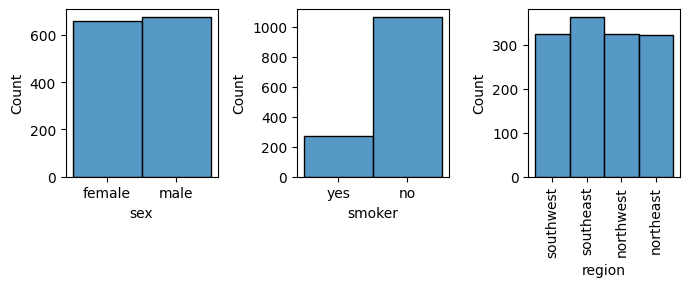

In [100]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (7, 3))

# Creating a multiple histogram:
sns.histplot(ax = axis[0], data = total_data, x = "sex")
sns.histplot(ax = axis[1], data = total_data, x = "smoker")
sns.histplot(ax = axis[2], data = total_data, x = "region")
axis[2].set_xticklabels(axis[2].get_xticklabels(), rotation=90)


#Adjust the plot
plt.tight_layout()

plt.show()

Los gráficos muestran claramente que hay la misma proporción de hombres y mujeres (siendo de los hombres un poco mayor), los fumadores son 5 veces menos que los no fumadores y la población está equitativamente repartida en las cuatro regiones, siendo de mayor proporción la de southeast.

*Analysis of numerical variables*

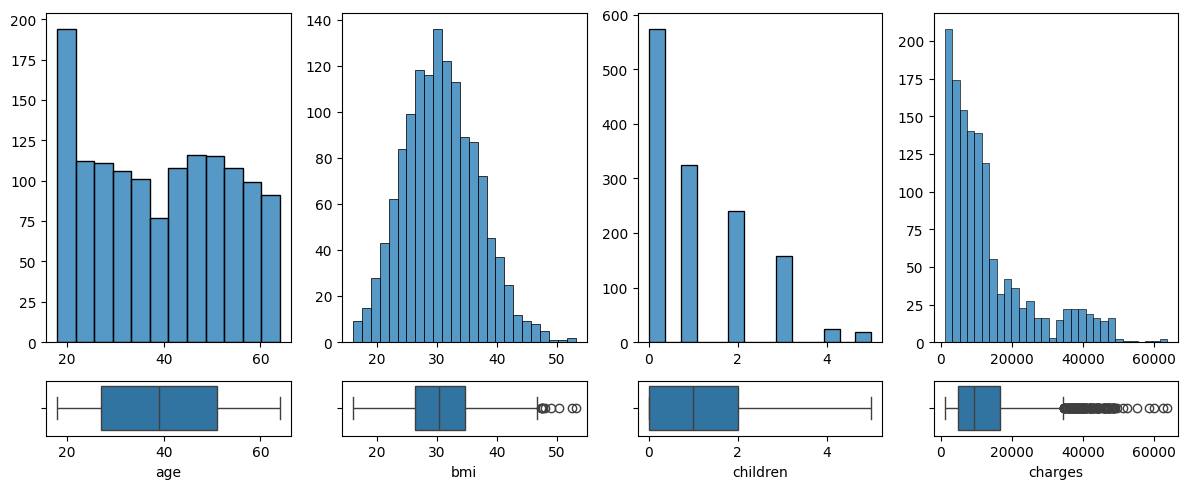

In [101]:
fig, axis = plt.subplots(2, 4, figsize = (12, 5), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot(ax = axis[0, 0], data = total_data, x = "age").set(xlabel = None, ylabel = None) 
sns.boxplot(ax = axis[1, 0], data = total_data, x = "age") 
sns.histplot(ax = axis[0, 1], data = total_data, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "bmi")
sns.histplot(ax = axis[0, 2], data = total_data, x = "children").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = total_data, x = "children")
sns.histplot(ax = axis[0, 3], data = total_data, x = "charges").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 3], data = total_data, x = "charges")

plt.tight_layout()

plt.show()

Los gráficos muestran que la variable "bmi" y "charges" presentan valores atípicos, que se distancian de una distribución estándar. Sin embargo, en la variable "bmi", puede esperarse que haya personas que se salgan de la norma y presenten un bmi superior y "charges" puede variar según cada persona; no muestra resultados que pueden considerarse esperables. 

*Analysis of multivariate variables*

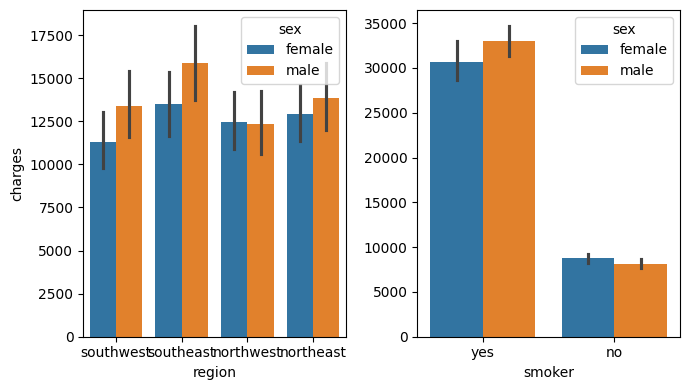

In [102]:
fig, axis = plt.subplots(figsize = (7, 4), ncols = 2)

sns.barplot(ax = axis[0], data = total_data, x = "region", y = "charges", hue = "sex")
sns.barplot(ax = axis[1], data = total_data, x = "smoker", y = "charges", hue = "sex").set(ylabel = None)

plt.tight_layout()

plt.show()

De la visualización de los gráficos se obtiene que hay mayor proporción de hombres sobre mujeres en la región de southeast y que hay mayor cantidad de hombres que fuman. 

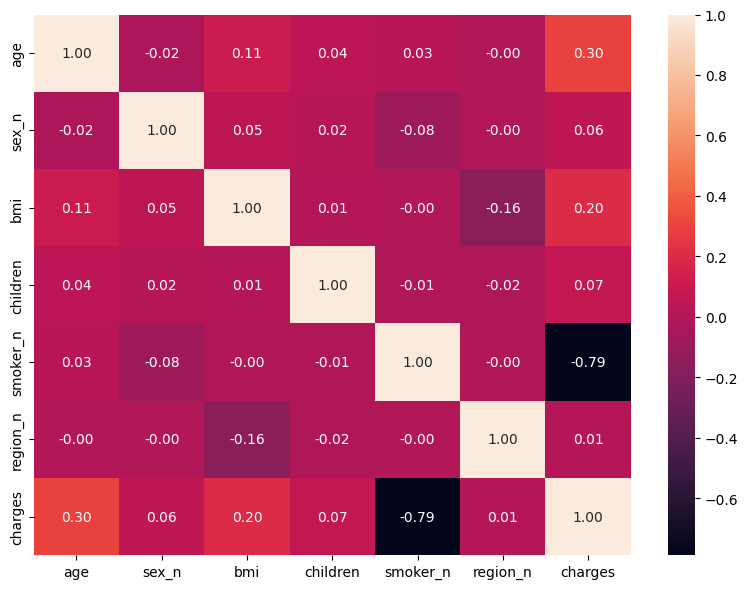

In [103]:
total_data["sex_n"] = pd.factorize(total_data["sex"])[0]
total_data["smoker_n"] = pd.factorize(total_data["smoker"])[0]
total_data["region_n"] = pd.factorize(total_data["region"])[0]

fig, axis = plt.subplots(figsize = (8, 6))

sns.heatmap(total_data[["age", "sex_n", "bmi", "children", "smoker_n", "region_n", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Existe una relación fuertemente negativa entre los fumadores y lo que pagan por el seguro; y hay una relación positiva entre la edad y el bmi.

*Feature engineering*

In [104]:
total_data.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.795217,1.484305
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,1.104885
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,1.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


In [105]:
total_data.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

In [106]:
from sklearn.model_selection import train_test_split

num_variables = ["age", "sex_n", "bmi", "children", "smoker_n", "region_n"]

# Split data in train and test
X = total_data.drop("charges", axis = 1)[num_variables]
y = total_data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,age,sex_n,bmi,children,smoker_n,region_n
560,46,0,19.95,2,1,2
1285,47,0,24.32,0,1,3
1142,52,0,24.86,0,1,1
969,39,0,34.32,5,1,1
486,54,0,21.47,3,1,2


*Normalization*

In [107]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,age,sex_n,bmi,children,smoker_n,region_n
560,0.608696,0.0,0.107345,0.4,1.0,0.666667
1285,0.630435,0.0,0.224913,0.0,1.0,1.000000
1142,0.739130,0.0,0.239440,0.0,1.0,0.333333
969,0.456522,0.0,0.493947,1.0,1.0,0.333333
486,0.782609,0.0,0.148238,0.6,1.0,0.666667


In [108]:
from sklearn.feature_selection import f_regression, SelectKBest

# Con un valor de k = 5 decimos implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,age,bmi,children,smoker_n
0,46.0,19.95,2.0,1.0
1,47.0,24.32,0.0,1.0
2,52.0,24.86,0.0,1.0
3,39.0,34.32,5.0,1.0
4,54.0,21.47,3.0,1.0


In [109]:
X_train_sel["charges"] = list(y_train)
X_test_sel["charges"] = list(y_test)

X_train_sel.to_csv("../data/processed/clean_insurance_train.csv", index=False)
X_test_sel.to_csv("../data/processed/clean_insurance_test.csv", index=False)

**<p align="center">LINEAR REGRESSION</p>**

In [110]:
train_data = pd.read_csv("../data/processed/clean_insurance_train.csv")
test_data = pd.read_csv("../data/processed/clean_insurance_test.csv")

train_data.head()

,age,bmi,children,smoker_n,charges
0,46.0,19.95,2.0,1.0,9193.83850
1,47.0,24.32,0.0,1.0,8534.67180
2,52.0,24.86,0.0,1.0,27117.99378
3,39.0,34.32,5.0,1.0,8596.82780
4,54.0,21.47,3.0,1.0,12475.35130


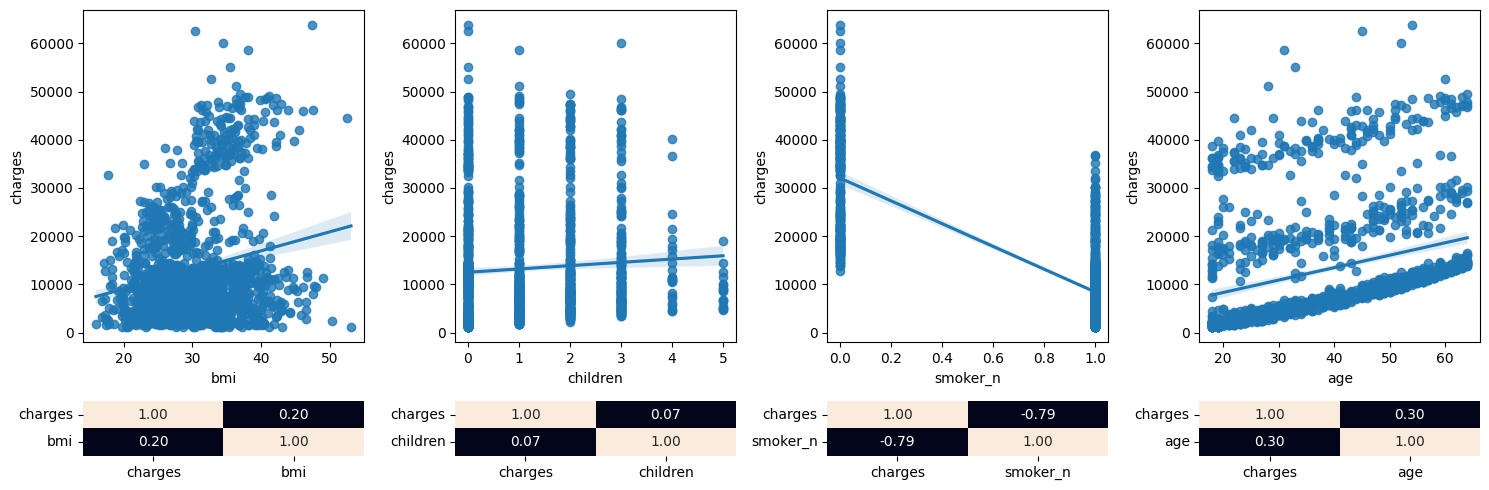

In [111]:
import matplotlib.pyplot as plt 

fig, axis = plt.subplots(2, 4, figsize = (15, 5), gridspec_kw={'height_ratios': [6, 1]})
total_data = pd.concat([train_data, test_data])

sns.regplot(ax = axis[0, 0], data = total_data, x = "bmi", y = "charges")
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "children", y = "charges")
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)
sns.regplot(ax = axis[0, 2], data = total_data, x = "smoker_n", y = "charges")
sns.heatmap(total_data[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)
sns.regplot(ax = axis[0, 3], data = total_data, x = "age", y = "charges")
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 3], cbar = False)


plt.tight_layout()

plt.show()

In [112]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

*Inicializing and training the model*

In [113]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [114]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients(b1, b2): {model.coef_}")

Intercep (a): 11536.136572186197
Coefficients(b1, b2): [   257.07115795    327.52263109    427.19997095 -23653.21164629]


*Prediction of the model*

In [115]:
y_pred = model.predict(X_test)
y_pred

array([ 8550.90921341,  6969.71599759, 36794.13661808,  9421.86824203,
       26875.01095777, 11101.26514111,   141.44896605, 16750.22436643,
         743.78364016, 11157.63586446, 28521.42342227,  9296.15962897,
        5456.5831315 , 38513.59317763, 40362.63211366, 37226.61219261,
       15312.47750251, 36042.83494384,  9322.40796481, 31395.64230108,
        4273.49461256, 10468.62243337,  2723.96491222,  6575.5287315 ,
       11228.01912269, 12468.20703945, 14803.23875441,  6062.13408867,
        9531.77127863,  2381.73787018,  9470.9842188 , 12959.38866372,
        4702.13338911,  3410.73606761,  4819.65393639, 12488.16536441,
        2355.2166747 ,  9157.11135848, 33234.15784494, 32746.69484389,
        4270.42403098,  4233.52485656, 14431.41993531, 11388.84943272,
        8929.60714179, 12484.19557109,  5150.40526844,  3550.1037231 ,
       35652.7853174 ,  9280.12457197, 15967.47938558,  2556.74541518,
       12158.95859481,  1066.73450634, 13555.51395976, 12107.63444981,
      

In [116]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean square error: {mean_squared_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")

Mean square error: 33981653.95019776
R2: 0.7811147722517886


CONCLUSIÓN: El modelo no representa una buena predicicón, ya que el MSE es muy alto y el R2 no alcanza siquiera el 80%. La correlación entre las variables predictoras y la objetivo es muy baja.